In [2]:
#loading necessary modules
import cv2
import os
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import keras
from keras.utils import np_utils
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [3]:
import json
d = dict(json.load(open('./translation.json')))
classes = list(d.keys())
classes

['equus-quagga',
 'panthera-leo',
 'panthera-onca',
 'ursus-arctos-horribilis',
 'megaptera-novaeangliae',
 'panthera-tigris',
 'haliaeetus-leucocephalus',
 'tyrannosaurus-rex',
 'diplodocus',
 'panthera-pardus',
 'homo-sapiens',
 'phoebetria-fusca',
 'bos-taurus',
 'gallus-gallus-domesticus',
 'ovis-aries',
 'ceratotherium-simum',
 'loxodonta-africana',
 'tursiops-truncatus',
 'orcinus-orca',
 'carcharodon-carcharias',
 'canis-lupus-familiaris',
 'felis-catus',
 'salmo-salar',
 'balaenoptera-musculus',
 'giraffa-camelopardalis',
 'ophiophagus-hannah',
 'crotalus-atrox',
 'varanus-komodoensis',
 'pterois-mombasae',
 'spinosaurus-aegyptiacus',
 'crocodylus-niloticus',
 'falco-peregrinus',
 'gorilla-gorilla',
 'pongo-abelii',
 'gavialis-gangeticus',
 'acinonyx-jubatus',
 'canis-lupus',
 'ursus-maritimus',
 'hippopotamus-amphibius',
 'iguana-iguana',
 'iguanodon-bernissartensis',
 'stegosaurus-stenops',
 'triceratops-horridus',
 'pteranodon-longiceps',
 'ankylosaurus-magniventris',
 'agal

In [4]:
X = []
y = []

In [8]:
os.getcwd()

'r:\\Online Courses, Workshops, contests, etc\\IEEE GTBIT ML Webinar\\animals_classification'

In [9]:
loc = './dataset'
for i in os.listdir(loc):
    for j in os.listdir(f'{ loc }/{ i }'):
        img = cv2.imread(f'{ loc }/{ i }/{ j }')
        img = cv2.resize(img, (100, 100))
        X.append(img)
        y.append(classes.index(i))

X = np.array(X)

In [10]:
#seeing a random item from dataset
import random
img = random.choice(X)
cv2.imshow('Image', img)

print(img.shape)

cv2.waitKey(0)
cv2.destroyAllWindows()

(100, 100, 3)


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3)

In [12]:
#One hot encoding of labels
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [21]:
save_loc = './save'

FileNotFoundError: [WinError 2] The system cannot find the file specified: './save'

In [22]:
#saving the train and test data in cwd
np.save(f'{save_loc}/X_train.npy', X_train)
np.save(f'{save_loc}/y_train.npy', y_train)
np.save(f'{save_loc}/X_test.npy', X_test)
np.save(f'{save_loc}/y_test.npy', y_test)

In [23]:
#loading train and test data
X_train = np.load(f'{save_loc}/X_train.npy')
X_test = np.load(f'{save_loc}/X_test.npy')

y_train = np.load(f'{save_loc}/y_train.npy')
y_test = np.load(f'{save_loc}/y_test.npy')

In [24]:
#to generate validation data
X_train, X_val = train_test_split(X_train, test_size=0.33, random_state=1)
y_train, y_val = train_test_split(y_train, test_size=0.33, random_state=1)

In [25]:
#model generation
#the archetecture of model
def generate_model(shape, nClasses):
    
    model = Sequential()
    
    model.add(Conv2D(32, (7,7), input_shape=shape, activation='relu'))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Conv2D(8, (3,3), activation='relu'))
    model.add(Conv2D(8, (3,3), activation='relu'))
    model.add(MaxPooling2D((10,10)))
    
    model.add(Flatten())
    
    model.add(Dense(nClasses, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
    
    return model

In [26]:
#to create a model
nClasses=len(classes)
shape = X_train[0].shape # 100 x 100 x 3

model = generate_model(shape,nClasses)

In [27]:
#summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 94, 94, 32)        4736      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 8)         2312      
                                                                 
 conv2d_2 (Conv2D)           (None, 43, 43, 8)         584       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 8)          0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 128)               0

In [33]:
#training the model
#saving the accuracy details in H

nEpochs = 5
batch_size = 32

H = model.fit(X_train, y_train, validation_data=(X_val, y_val),
              epochs=nEpochs, batch_size=batch_size)

Epoch 1/5
88/88 [==============================] - 20s 229ms/step - loss: 4.9747 - accuracy: 0.0161 - val_loss: 5.0345 - val_accuracy: 0.0087
Epoch 2/5
88/88 [==============================] - 16s 185ms/step - loss: 4.9555 - accuracy: 0.0168 - val_loss: 5.0266 - val_accuracy: 0.0101
Epoch 3/5
88/88 [==============================] - 17s 192ms/step - loss: 4.9320 - accuracy: 0.0186 - val_loss: 5.0555 - val_accuracy: 0.0101
Epoch 4/5
88/88 [==============================] - 17s 195ms/step - loss: 4.9031 - accuracy: 0.0207 - val_loss: 5.0895 - val_accuracy: 0.0116
Epoch 5/5
88/88 [==============================] - 17s 195ms/step - loss: 4.8744 - accuracy: 0.0271 - val_loss: 5.1568 - val_accuracy: 0.0109


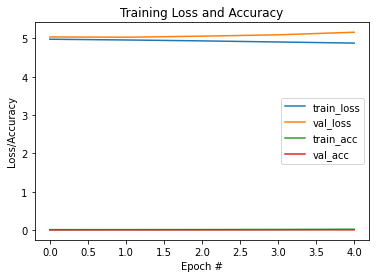

In [34]:
#to know if model is overfit
#to draw a plot between accuracy and validation accuracy
#to draw a plot between loss and validation loss
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")

plt.plot(np.arange(0, nEpochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, nEpochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, nEpochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, nEpochs), H.history["val_accuracy"], label="val_acc")
plt.legend()

plt.show()

In [35]:
model.save(f'{save_loc}/animals_classifier.h5')

In [36]:
#to find the accuaracy of the model
score = model.evaluate(X_test, y_test)
print('Accuracy : {:.2f}'.format(score[1]*100))

66/66 [==============================] - 3s 45ms/step - loss: 5.1906 - accuracy: 0.0091
Accuracy : 0.91


In [ ]:
cam = cv2.VideoCapture(0)

font = cv2.FONT_HERSHEY_SIMPLEX 
org = (0, 40) 
fontScale = 1
color = (0, 0, 255) 
thickness = 2

In [ ]:
while True:
    ret, img = cam.read()
    shape = (img.shape[1], img.shape[0])
    
    img1 = img.copy()
    
    img = cv2.resize(img, (100, 100))
    img = np.reshape(img, (1, 100, 100, 3))
    
    score = list(model.predict(img).tolist())[0]
    label = classes[score.index(max(score))]
    
    img1 = cv2.putText(img1, label, org, font,  
                   fontScale, color, thickness, cv2.LINE_AA)
    
    cv2.imshow('Camera', img1)
    
    k = cv2.waitKey(100)
    if k == 27:
        break
        
cam.release()
cv2.destroyAllWindows()

In [ ]:
font = cv2.FONT_HERSHEY_SIMPLEX 
org = (0, 40) 
fontScale = 1
color = (0, 0, 255) 
thickness = 2
n = 'test10.jpg'

img = cv2.imread(n)

img1 = img.copy()

img = cv2.resize(img, (100, 100))
img = np.reshape(img, (1, 100, 100, 3))

score = list(model.predict(img).tolist())[0]
label = classes[score.index(max(score))]

img1 = cv2.resize(img1, (1000, 1000))
img1 = cv2.putText(img1, label, org, font,  
               fontScale, color, thickness, cv2.LINE_AA)

cv2.imwrite(n[:-4]+'_result.jpg', img1)
        

cv2.destroyAllWindows()